# I. Data Import

In [131]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random as r
from scipy import sparse

In [132]:
# # import file ratings
# ratings = pd.read_csv('ratings.csv')
# print(ratings)
# # import file movies
# movies = pd.read_csv('movies.csv')
# print(movies)


In [133]:
#Chi
# Đường dẫn đến tập tin movies.csv
file_path_1= 'C:\\Users\\Admin\\Desktop\\Recommendation_Movie\\movies.csv'
# Đọc dữ liệu từ CSV vào DataFrame
movies = pd.read_csv(file_path_1)
# Hiển thị DataFrame trong VS Code
print(movies)

# Đường dẫn đến tập tin CSV
file_path_2= 'C:\\Users\\Admin\\Desktop\\Recommendation_Movie\\ratings.csv'
# Đọc dữ liệu từ CSV vào DataFrame
ratings = pd.read_csv(file_path_2)
# Hiển thị DataFrame trong VS Code
print(ratings)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

 #  II. Data Cleaning

## Cleaning file movies.csv

In [134]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [135]:
# Chuyển tất cả các giá trị trong cột genres về chữ thường
movies['genres'] = movies['genres'].str.lower()

# Chuyển đổi genres về dạng danh sách
movies['genres'] = movies['genres'].str.split('|')

# Chuyển tất cả các giá trị trong cột title về chữ thường
movies['title'] = movies['title'].str.lower()

# Trích xuất cột year từ title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Thay thế giá trị thiếu trong year bằng 'unknown'
movies['year'].fillna('unknown', inplace=True)

# Xóa thông tin năm khỏi title
movies['title'] = movies['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

movies


C:\Users\Admin\AppData\Local\Temp\ipykernel_7428\2474313113.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['year'].fillna('unknown', inplace=True)


,movieId,title,genres,year
0,1,toy story,"[adventure, animation, children, comedy, fantasy]",1995
1,2,jumanji,"[adventure, children, fantasy]",1995
2,3,grumpier old men,"[comedy, romance]",1995
3,4,waiting to exhale,"[comedy, drama, romance]",1995
4,5,father of the bride part ii,[comedy],1995
...,...,...,...,...
9737,193581,black butler: book of the atlantic,"[action, animation, comedy, fantasy]",2017
9738,193583,no game no life: zero,"[animation, comedy, fantasy]",2017
9739,193585,flint,[drama],2017
9740,193587,bungo stray dogs: dead apple,"[action, animation]",2018


In [136]:
#Kiểm tra giá trị null
movies.isnull().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

## Cleaning file ratings.csv

In [137]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [138]:
ratings.duplicated().sum()

np.int64(0)

In [139]:
# Xóa Timestamp
ratings.drop('timestamp', axis=1, inplace=True)

# Xóa trùng lắp
ratings.drop_duplicates(inplace=True)

ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


## Merging file movies and ratings

In [140]:
df = pd.merge(ratings, movies, on='movieId')
df

,userId,movieId,rating,title,genres,year
0,1,1,4.0,toy story,"[adventure, animation, children, comedy, fantasy]",1995
1,1,3,4.0,grumpier old men,"[comedy, romance]",1995
2,1,6,4.0,heat,"[action, crime, thriller]",1995
3,1,47,5.0,seven (a.k.a. se7en),"[mystery, thriller]",1995
4,1,50,5.0,"usual suspects, the","[crime, mystery, thriller]",1995
...,...,...,...,...,...,...
100831,610,166534,4.0,split,"[drama, horror, thriller]",2017
100832,610,168248,5.0,john wick: chapter two,"[action, crime, thriller]",2017
100833,610,168250,5.0,get out,[horror],2017
100834,610,168252,5.0,logan,"[action, sci-fi]",2017


In [141]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [142]:
# Kiểm tra trùng lắp
num_dpl = df.duplicated(subset=['userId', 'movieId'], keep=False).sum()
print("Số lượng dòng trùng lặp:", num_dpl)


Số lượng dòng trùng lặp: 0


In [143]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


# III. Data Visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_7428\92877419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette="viridis")


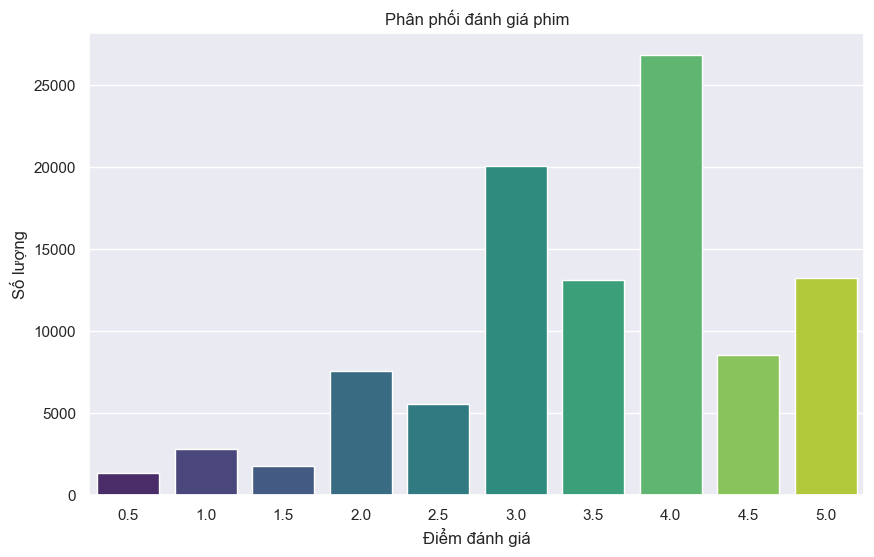

In [144]:
# Thiết lập kiểu nền seaborn
sns.set(style="darkgrid")

# Vẽ biểu đồ phân phối của ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette="viridis")
plt.title("Phân phối đánh giá phim")
plt.xlabel("Điểm đánh giá")
plt.ylabel("Số lượng")
plt.show()

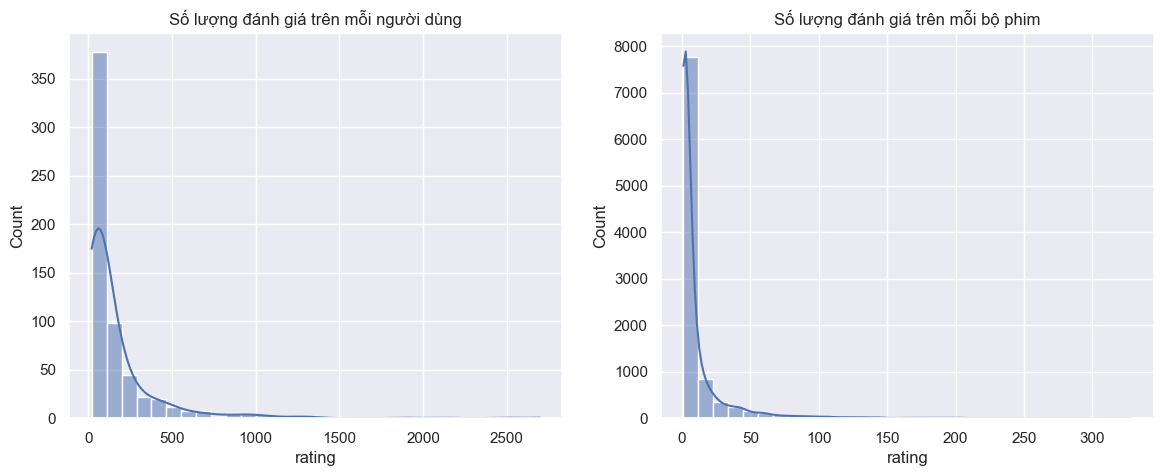

In [145]:
# Số lượng đánh giá trên mỗi người dùng
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(ratings.groupby('userId')['rating'].count(), bins=30, kde=True)
plt.title("Số lượng đánh giá trên mỗi người dùng")

# Số lượng đánh giá trên mỗi bộ phim
movie_counts = ratings.groupby('movieId')['rating'].count()
plt.subplot(1, 2, 2)
sns.histplot(movie_counts, bins=30, kde=True)
plt.title("Số lượng đánh giá trên mỗi bộ phim")
plt.show()

### Phân tích phân phối điểm đánh giá theo người dùng:
     userId    rating
0         1  4.366379
1         2  3.948276
2         3  2.435897
3         4  3.555556
4         5  3.636364
..      ...       ...
605     606  3.657399
606     607  3.786096
607     608  3.134176
608     609  3.270270
609     610  3.688556

[610 rows x 2 columns]


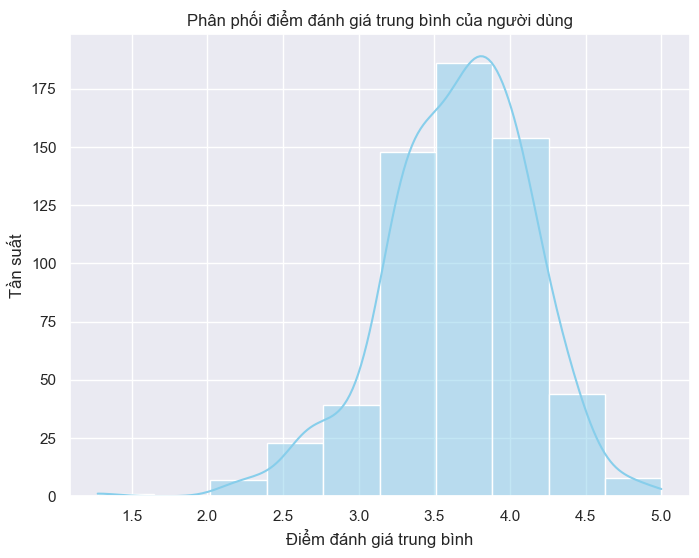

In [146]:
# Phân tích điểm đánh giá trung bình theo người dùng
print("### Phân tích phân phối điểm đánh giá theo người dùng:")

# Tính điểm trung bình cho từng người dùng
user_avg_ratings = df.groupby('userId')['rating'].mean().reset_index()
# In kết quả điểm trung bình của mỗi người dùng
print(user_avg_ratings)

# Vẽ histogram phân phối điểm trung bình đánh giá của người dùng
plt.figure(figsize=(8, 6))
sns.histplot(user_avg_ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title('Phân phối điểm đánh giá trung bình của người dùng')
plt.xlabel('Điểm đánh giá trung bình')
plt.ylabel('Tần suất')
plt.show()


### Phân tích thể loại phim:


C:\Users\Admin\AppData\Local\Temp\ipykernel_7428\1352826568.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts[:10].index, y=genre_counts[:10].values, ax=axes[0], palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7428\1352826568.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts[-10:].index, y=genre_counts[-10:].values, ax=axes[1], palette='viridis')


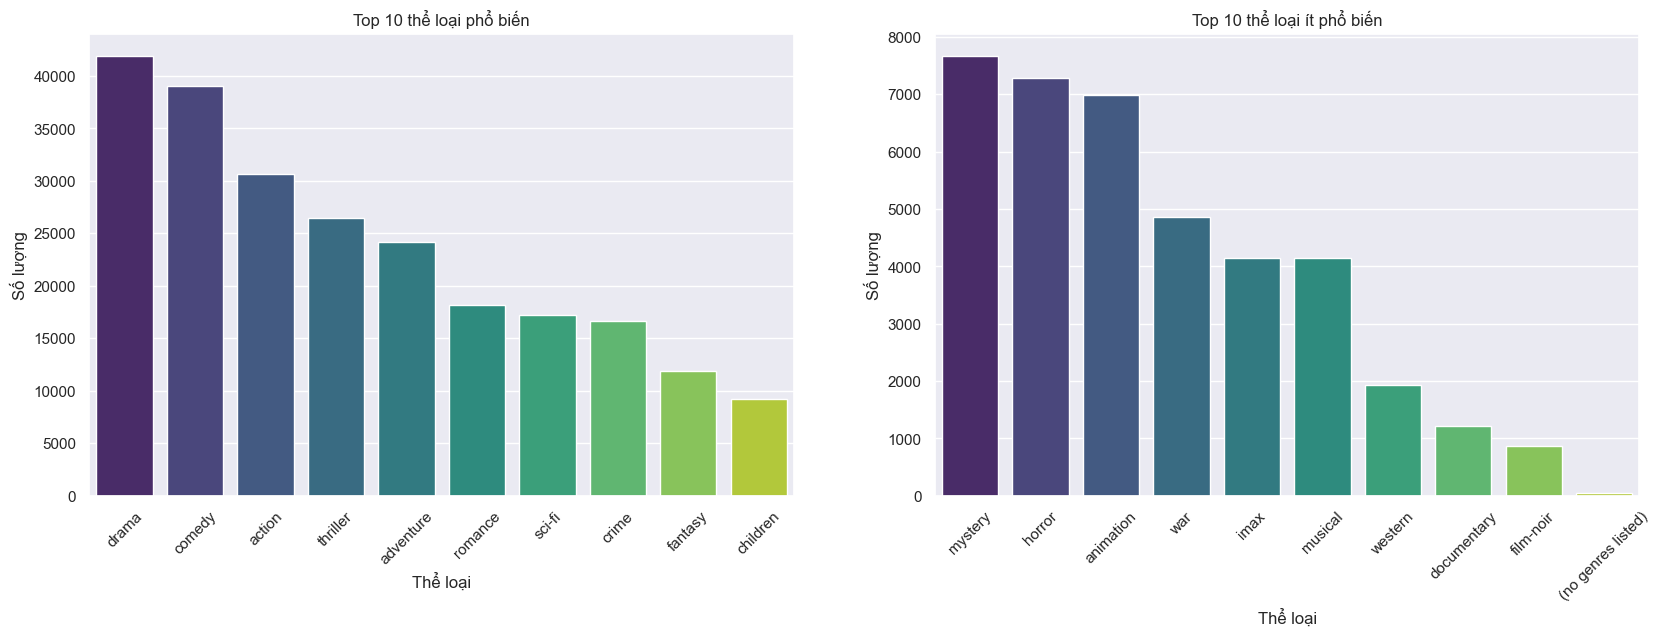

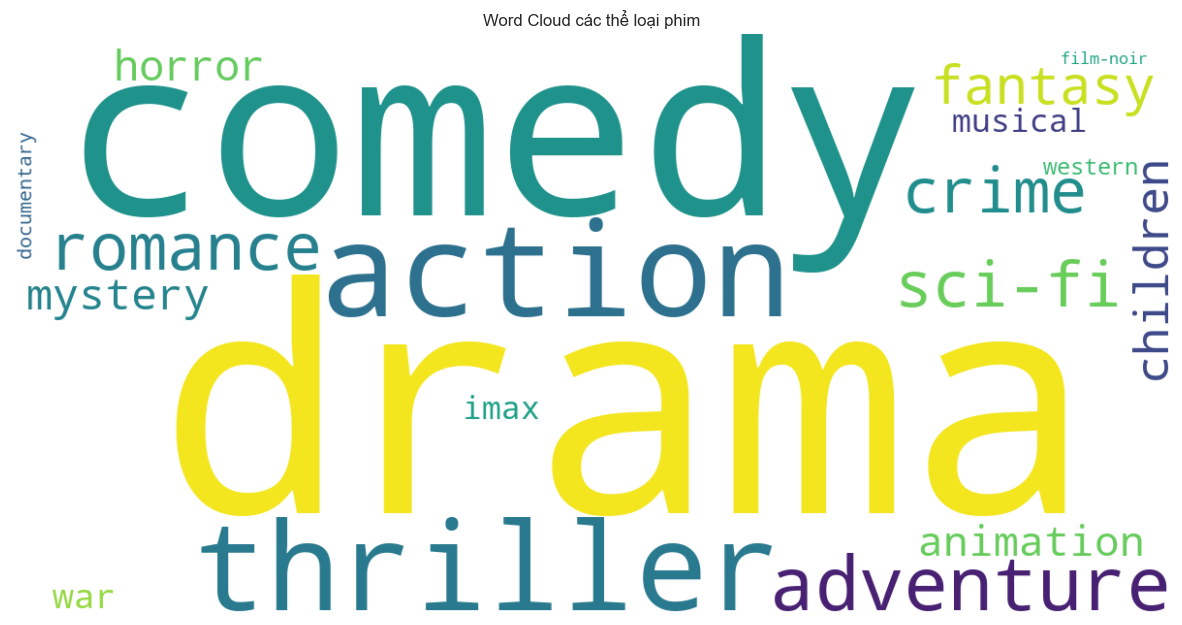

In [147]:
print("\n### Phân tích thể loại phim:")

# Xử lý và đếm tần suất các thể loại
all_genres = [genre for genres in df['genres'] if isinstance(genres, list) for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Top 10 Thể loại phổ biến
sns.barplot(x=genre_counts[:10].index, y=genre_counts[:10].values, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 thể loại phổ biến')
axes[0].set_xlabel('Thể loại')
axes[0].set_ylabel('Số lượng')
axes[0].tick_params(axis='x', rotation=45)

# 10 Thể loại ít phổ biến
sns.barplot(x=genre_counts[-10:].index, y=genre_counts[-10:].values, ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 thể loại ít phổ biến')
axes[1].set_xlabel('Thể loại')
axes[1].set_ylabel('Số lượng')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

# Xử lý dữ liệu cho Word Cloud
all_genres = [genre for genres in df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x) for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()

# Tạo Word Cloud của các thể loại phim
wordcloud = WordCloud(width=1200, height=600, background_color='white',
                              min_font_size=10).generate_from_frequencies(genre_counts)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud các thể loại phim')
plt.show()

# Outlier handling and Data Transformation

In [148]:
# Tính số lượng đánh giá trung bình trên mỗi mục
average_ratings_per_item = df['movieId'].value_counts().mean()
print(f"Số lượng đánh giá trung bình trên mỗi mục: {average_ratings_per_item}")

Số lượng đánh giá trung bình trên mỗi mục: 10.369806663924312


In [149]:
# Bayesian Average cho movieId
movie_counts = df['movieId'].value_counts()
movie_means = df.groupby('movieId')['rating'].mean()
global_mean = df['rating'].mean()
k = 10 # Tham số làm mượt

# Áp dụng Bayesian Average
adjusted_ratings = (movie_counts * movie_means + k * global_mean) / (movie_counts + k)
df['adjusted_movie_rating'] = df['movieId'].map(adjusted_ratings)


In [150]:
# Tỷ lệ nghịch cho userId
user_counts = df['userId'].value_counts()
max_count = user_counts.max()
min_count = user_counts.min()

# Áp dụng trọng số tỷ lệ nghịch
user_weights = user_counts.apply(lambda x: (max_count - x) / (max_count - min_count))
df['user_weight'] = df['userId'].map(user_weights)

# Áp dụng trọng số vào rating
df['weighted_rating'] = df['adjusted_movie_rating'] * df['user_weight']

In [151]:
from sklearn.preprocessing import LabelEncoder

# Chuẩn hóa userId và movieId thành khoảng liên tục
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df['userId'] = user_encoder.fit_transform(df['userId'])
df['movieId'] = item_encoder.fit_transform(df['movieId'])

df

,userId,movieId,rating,title,genres,year,adjusted_movie_rating,user_weight,weighted_rating
0,0,0,4.0,toy story,"[adventure, animation, children, comedy, fantasy]",1995,3.902291,0.920836,3.593372
1,0,2,4.0,grumpier old men,"[comedy, romance]",1995,3.298638,0.920836,3.037506
2,0,5,4.0,heat,"[action, crime, thriller]",1995,3.906389,0.920836,3.597145
3,0,43,5.0,seven (a.k.a. se7en),"[mystery, thriller]",1995,3.953125,0.920836,3.640181
4,0,46,5.0,"usual suspects, the","[crime, mystery, thriller]",1995,4.203344,0.920836,3.870592
...,...,...,...,...,...,...,...,...,...
100831,609,9416,4.0,split,"[drama, horror, thriller]",2017,3.438473,0.521285,1.792423
100832,609,9443,5.0,john wick: chapter two,"[action, crime, thriller]",2017,3.765622,0.521285,1.962960
100833,609,9444,5.0,get out,[horror],2017,3.580623,0.521285,1.866523
100834,609,9445,5.0,logan,"[action, sci-fi]",2017,4.057588,0.521285,2.115158


# IV. Model Training and Evaluation


## 1. Content-based Filtering

In [152]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Bước 1: Chuyển cột genres thành chuỗi
df['genres_str'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
def clean_genres(genres):
    return ['no genres' if genre == '(no genres listed)' else genre for genre in genres]

df['genres'] = df['genres'].apply(clean_genres)

# Bước 2: Lấy danh sách tất cả các thể loại
all_genres = set(genre for genres in df['genres'] for genre in genres)

# Chia dữ liệu sao cho mỗi thể loại đều có trong cả train và test
train_indices = set()
test_indices = set()

for genre in all_genres:
    # Lọc các phim chứa thể loại này
    genre_movies = df[df['genres_str'].str.contains(genre)]
    
    # Lấy chỉ số chưa được chọn
    available_indices = genre_movies.index.difference(train_indices.union(test_indices))
    if available_indices.empty:
        continue

    # Chia tập train và test
    train, test = train_test_split(genre_movies.loc[available_indices], test_size=0.4, random_state=42)
    train_indices.update(train.index)
    test_indices.update(test.index)

# Đảm bảo không có sự trùng lặp
train_indices = list(set(train_indices) - set(test_indices))
test_indices = list(set(test_indices) - set(train_indices))

# Tạo tập train và test
train_df = df.loc[train_indices]
test_df = df.loc[test_indices]

# Kiểm tra kích thước
print("Kích thước df_merge:", df.shape)
print("Kích thước train_df:", train_df.shape)
print("Kích thước test_df:", test_df.shape)

# Kiểm tra thể loại trong mỗi tập
train_genres = set(genre for genres in train_df['genres'] for genre in genres)
test_genres = set(genre for genres in test_df['genres'] for genre in genres)
print("Genres trong train:", train_genres)
print("Genres trong test:", test_genres)

Kích thước df_merge: (100836, 10)
Kích thước train_df: (60493, 10)
Kích thước test_df: (40343, 10)
Genres trong train: {'comedy', 'crime', 'romance', 'children', 'adventure', 'sci-fi', 'war', 'action', 'western', 'drama', 'no genres', 'imax', 'horror', 'film-noir', 'animation', 'fantasy', 'mystery', 'thriller', 'documentary', 'musical'}
Genres trong test: {'comedy', 'crime', 'romance', 'children', 'adventure', 'sci-fi', 'war', 'action', 'western', 'drama', 'no genres', 'imax', 'horror', 'film-noir', 'animation', 'fantasy', 'mystery', 'thriller', 'documentary', 'musical'}


In [154]:
# Reset chỉ mục cho train_df và test_df
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df

,userId,movieId,rating,title,genres,year,adjusted_movie_rating,user_weight,weighted_rating,genres_str
0,0,2,4.0,grumpier old men,"[comedy, romance]",1995,3.298638,0.920836,3.037506,"comedy, romance"
1,0,46,5.0,"usual suspects, the","[crime, mystery, thriller]",1995,4.203344,0.920836,3.870592,"crime, mystery, thriller"
2,0,62,3.0,from dusk till dawn,"[action, comedy, horror, thriller]",1996,3.507932,0.920836,3.230231,"action, comedy, horror, thriller"
3,0,89,5.0,bottle rocket,"[adventure, comedy, crime, romance]",1996,3.697442,0.920836,3.404739,"adventure, comedy, crime, romance"
4,0,97,4.0,braveheart,"[action, drama, war]",1995,4.010184,0.920836,3.692724,"action, drama, war"
...,...,...,...,...,...,...,...,...,...,...
60488,609,9317,3.0,lights out,[horror],2016,3.417964,0.521285,1.781732,horror
60489,609,9339,4.0,hell or high water,"[crime, drama]",2016,3.528643,0.521285,1.839427,"crime, drama"
60490,609,9371,3.5,blair witch,"[horror, thriller]",2016,3.501415,0.521285,1.825234,"horror, thriller"
60491,609,9374,5.0,arrival,[sci-fi],2016,3.847655,0.521285,2.005723,sci-fi


In [155]:
# Vector hóa thể loại bằng CountVectorizer
train_genre_texts = [' '.join(genres) for genres in train_df['genres']]
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
count_train = count_vectorizer.fit_transform(train_genre_texts)

# Chuyển ma trận đếm từ sparse matrix thành DataFrame
count_train_df = pd.DataFrame(count_train.toarray(), columns=count_vectorizer.get_feature_names_out())

#Hiển thị ma trận đếm
count_train_df

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,...,horror,imax,musical,mystery,no,romance,sci-fi,thriller,war,western
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60488,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
60489,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60490,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
60491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [156]:
# Vector hóa thể loại bằng CountVectorizer
test_genre_texts = [' '.join(genres) for genres in test_df['genres']]
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
count_test = count_vectorizer.fit_transform(test_genre_texts)

# Chuyển ma trận đếm từ sparse matrix thành DataFrame
count_test_df = pd.DataFrame(count_test.toarray(), columns=count_vectorizer.get_feature_names_out())

#Hiển thị ma trận đếm
count_test_df

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,...,horror,imax,musical,mystery,no,romance,sci-fi,thriller,war,western
0,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40338,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
40339,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
40340,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40341,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [157]:
# Sử dụng TfidfTransformer để chuyển đổi Count Matrix sang TF-IDF Matrix
tfidf_transformer_1 = TfidfTransformer(smooth_idf=True, norm ='l2')
tfidf_train = tfidf_transformer_1.fit_transform(count_train)

# Chuyển sparse matrix thành dense matrix
tfidf_dense = tfidf_train.toarray()

# Lấy tên các từ (features) từ CountVectorizer
features = count_vectorizer.get_feature_names_out()

# Chuyển đổi thành DataFrame
tfidf_df = pd.DataFrame(tfidf_dense, columns=features)

# In DataFrame
tfidf_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,...,horror,imax,musical,mystery,no,romance,sci-fi,thriller,war,western
0,0.000000,0.00000,0.0,0.0,0.583705,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.811966,0.0,0.000000,0.000000,0.0
1,0.000000,0.00000,0.0,0.0,0.000000,0.548009,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.700273,0.0,0.000000,0.0,0.457497,0.000000,0.0
2,0.420252,0.00000,0.0,0.0,0.373048,0.000000,0.0,0.000000,0.0,0.0,...,0.695189,0.0,0.0,0.000000,0.0,0.000000,0.0,0.448259,0.000000,0.0
3,0.000000,0.48795,0.0,0.0,0.390097,0.561482,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.542647,0.0,0.000000,0.000000,0.0
4,0.442734,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.377765,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.813191,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60488,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
60489,0.000000,0.00000,0.0,0.0,0.000000,0.831607,0.0,0.555365,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
60490,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.840434,0.0,0.0,0.000000,0.0,0.000000,0.0,0.541914,0.000000,0.0
60491,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0


In [158]:
# Sử dụng TfidfTransformer để chuyển đổi Count Matrix sang TF-IDF Matrix
tfidf_transformer_2 = TfidfTransformer(smooth_idf=True, norm ='l2')
tfidf_test = tfidf_transformer_2.fit_transform(count_test)

# Chuyển sparse matrix thành dense matrix
tfidf_dense = tfidf_test.toarray()

# Lấy tên các từ (features) từ CountVectorizer
features = count_vectorizer.get_feature_names_out()

# Chuyển đổi thành DataFrame
tfidf_df = pd.DataFrame(tfidf_dense, columns=features)

# In DataFrame
tfidf_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,...,horror,imax,musical,mystery,no,romance,sci-fi,thriller,war,western
0,0.000000,0.362594,0.549329,0.509069,0.292452,0.000000,0.0,0.000000,0.471258,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.515014,0.000000,0.000000,0.000000,0.000000,0.657645,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.549785,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.836578,0.0,0.0,0.000000,0.547848,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.435044,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.900409,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40338,0.411811,0.455194,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.591608,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.522695,0.000000,0.000000,0.0
40339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.400858,0.000000,0.0,...,0.770036,0.0,0.0,0.000000,0.0,0.0,0.000000,0.496344,0.000000,0.0
40340,0.515014,0.000000,0.000000,0.000000,0.000000,0.657645,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.549785,0.000000,0.0
40341,0.618864,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.785498,0.000000,0.000000,0.0


In [159]:
# Xây dựng ma trận người dùng - genres 
# Tạo một DataFrame mới với mỗi thể loại trên một dòng
expanded_df = train_df.explode('genres')  # Mỗi thể loại sẽ trở thành một dòng mới

# Tính trung bình đánh giá cho mỗi userId và genre
user_genre_df = expanded_df.groupby(['userId', 'genres'])['rating'].mean().unstack(fill_value=0)

# Kết quả là một DataFrame với các userId và các thể loại, giá trị là trung bình đánh giá của người dùng
user_genre_df

genres,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,imax,musical,mystery,no genres,romance,sci-fi,thriller,war,western
userId,,,,,,,,,,,,,,,,,,,,
0,4.238095,4.290909,4.650000,4.548387,4.250000,4.300000,0.000000,4.469388,4.257143,0.000000,3.500000,0.000000,4.764706,3.846154,0.0,4.391304,4.137931,3.921053,4.500000,4.600000
1,4.200000,5.000000,0.000000,0.000000,3.666667,4.000000,4.333333,4.142857,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,0.0,4.500000,4.166667,4.166667,4.500000,3.500000
2,3.916667,2.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,4.750000,0.000000,4.666667,0.000000,0.000000,5.000000,0.0,0.500000,4.600000,4.000000,0.500000,0.000000
3,3.437500,3.882353,4.000000,4.000000,3.611940,3.800000,3.000000,3.571429,3.818182,4.000000,4.000000,3.000000,3.777778,3.769231,0.0,3.647059,3.000000,3.380952,4.500000,3.571429
4,3.600000,3.666667,4.200000,4.142857,3.750000,3.833333,0.000000,3.705882,4.200000,0.000000,3.000000,3.000000,4.250000,0.000000,0.0,2.833333,0.000000,4.000000,2.500000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.315217,3.640449,3.720000,3.441176,3.606719,3.635802,3.750000,3.787990,3.614035,3.800000,3.370370,3.250000,3.703704,3.789474,0.0,3.758794,3.625000,3.503906,3.787879,3.600000
606,3.760870,3.464286,4.000000,3.714286,3.440000,3.714286,0.000000,4.022222,3.687500,0.000000,4.250000,0.000000,4.000000,4.700000,0.0,3.789474,3.409091,4.146341,5.000000,4.000000
607,3.229167,3.187500,3.220588,2.410714,2.659722,3.563953,3.000000,3.324405,2.817460,3.500000,3.224138,4.125000,2.676471,3.402778,0.0,2.798611,3.210784,3.470000,3.500000,2.333333


In [160]:
from sklearn.linear_model import Ridge

# Hàm huấn luyện Ridge cho từng người dùng trên tâp dữ liêu Train
def train_user_ridge_model(user_id, user_ratings, tfidf_train, user_genre_df):
    # Lấy vector thể loại của người dùng
    user_genre_vector = user_genre_df.loc[user_id].values
    
    # Tìm chỉ số các phim đã đánh giá của người dùng trong train_df
    movie_indices = train_df[train_df['userId'] == user_id].index
    movie_vectors = tfidf_train[movie_indices].toarray()  # Chuyển đổi thành ma trận số học
    
    X_user = np.hstack([movie_vectors, np.tile(user_genre_vector, (movie_vectors.shape[0], 1))])
    
    # Lấy các đánh giá của người dùng cho các phim
    y_user = user_ratings['rating'].values
    
    # Huấn luyện mô hình Ridge
    ridge_user = Ridge(alpha=4.0) # Thay đổi alpha để có kết quả tốt hơn
    ridge_user.fit(X_user, y_user)
    return ridge_user

# Huấn luyện mô hình cho tất cả người dùng
user_models = {
    user_id: train_user_ridge_model(user_id, train_df[train_df['userId'] == user_id], tfidf_train, user_genre_df)
    for user_id in train_df['userId'].unique()
}

In [161]:
# Hàm dự đoán Rating cho tập dữ liệu Test bằng mô hình vừa học
def predict_user_rating(user_id, movie_id, user_models, tfidf_test, test_df, user_genre_df):
    movie_index = test_df[test_df['movieId'] == movie_id].index[0]
    movie_vector = tfidf_test[movie_index].toarray().flatten()
    user_genre_vector = user_genre_df.loc[user_id].values
    combined_vector = np.concatenate([movie_vector, user_genre_vector])
    return user_models[user_id].predict([combined_vector])[0]

In [162]:
# Thực hiện dự đoán Rating, đề xuất phim cho người dùng trên tập Test sắp xếp các Rating từ cao đến thấp
predictions = []
for _, row in test_df.iterrows():
    pred_rating = predict_user_rating(row['userId'], row['movieId'], user_models, tfidf_test, test_df, user_genre_df)
    if pred_rating is not None:
        predictions.append({
            'userId': row['userId'],
            'movieId': row['movieId'],
            'true_rating': row['rating'],
            'predicted_rating': pred_rating
        })

# Chuyển danh sách predictions thành DataFrame
predictions_df = pd.DataFrame(predictions)

# Sắp xếp theo 'userId' và 'predicted_rating' từ cao đến thấp
sorted_predictions = predictions_df.sort_values(by=['userId', 'predicted_rating'], ascending=[True, False])

# In kết quả
print(sorted_predictions[['userId', 'movieId', 'true_rating', 'predicted_rating']])


       userId  movieId  true_rating  predicted_rating
15          0      786          5.0          4.837474
38          0     1558          4.0          4.778394
33          0     1492          5.0          4.712084
40          0     1596          5.0          4.690045
19          0      913          5.0          4.661752
...       ...      ...          ...               ...
40165     609     7097          5.0          3.252782
40044     609     5523          4.5          3.213451
40079     609     6126          2.0          3.209167
39931     609     3057          5.0          3.160288
40061     609     5783          3.5          3.114322

[40343 rows x 4 columns]


###  RMSE - Content_based_Filtering

In [163]:
from sklearn.metrics import mean_squared_error

# Đánh giá mô hình bằng MSE, RMSE
y_true, y_pred = [], []
for _, row in test_df.iterrows():
    pred_rating = predict_user_rating(row['userId'], row['movieId'], user_models, tfidf_test, test_df, user_genre_df)
    if pred_rating is not None:
        y_true.append(row['rating'])
        y_pred.append(pred_rating)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.9118882780482396


In [164]:
import numpy as np

# Kiểm tra các giá trị Dự đoán cho các bộ phim trong test_df cớ hợp lệ hay không
y_pred = []
for _, row in test_df.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    predicted_rating = predict_user_rating(user_id, movie_id, user_models, tfidf_train, test_df, user_genre_df)
    
    if predicted_rating is not None:
        y_pred.append(predicted_rating)

# Kiểm tra xem có giá trị dự đoán nào lớn hơn 5 hoặc nhỏ hơn 0 không
y_pred = np.array(y_pred)

invalid_predictions = np.where((y_pred > 5) | (y_pred < 0))  # Tìm các vị trí có giá trị ngoài khoảng [0, 5]

if len(invalid_predictions[0]) > 0:
    print("Có các giá trị dự đoán ngoài phạm vi hợp lệ (0 <= rating <= 5):")
    print(f"Các chỉ số dự đoán không hợp lệ: {invalid_predictions[0]}")
    print(f"Các giá trị không hợp lệ: {y_pred[invalid_predictions]}")
else:
    print("Tất cả các giá trị dự đoán đều hợp lệ (trong khoảng [0, 5]).")
    
# -> Dự đoán có các giá trị lớn hơn 5 nhưng sai số không nhiều có thể chấp nhận được

Có các giá trị dự đoán ngoài phạm vi hợp lệ (0 <= rating <= 5):
Các chỉ số dự đoán không hợp lệ: [33833 33841 33849]
Các giá trị không hợp lệ: [5.04044968 5.01741287 5.00398366]


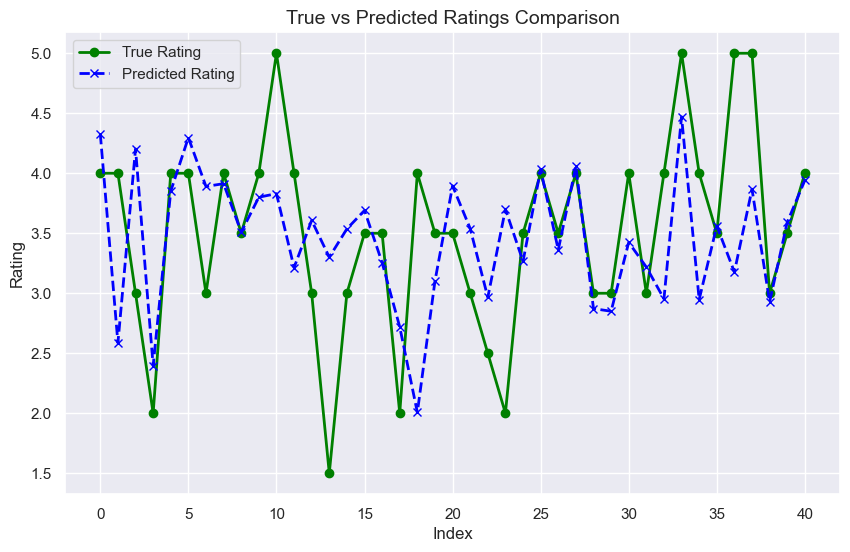

In [177]:
import matplotlib.pyplot as plt

# Tạo biểu đồ đường so sánh
plt.figure(figsize=(10, 6))

# Vẽ đường cho y thực tế
plt.plot(y_true[::1000], label='True Rating', color='green', marker='o', linestyle='-', linewidth=2)

# Vẽ đường cho y dự đoán
plt.plot(y_pred[::1000], label='Predicted Rating', color='blue', marker='x', linestyle='--', linewidth=2)

# Tùy chỉnh tiêu đề và các nhãn trục
plt.title('True vs Predicted Ratings Comparison', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.grid(True) 
plt.show()

## 2. Collaborative_Filtering

In [165]:
class CF():
    """Bộ lọc cộng tác sử dụng phương pháp KNN
    Giả định đầu vào có cấu trúc:
    user_id, item_id, rating
    """
    def __init__(self, Y_data, k, dist_func=cosine_similarity, uuCF=1):
        self.uuCF = uuCF  # user-user (1) hoặc item-item (0) CF
        self.Y_data = Y_data if uuCF else Y_data[:, [1, 0, 2]]  # Đổi vị trí cột nếu là CF item-item
        self.k = k  # số lượng hàng xóm gần nhất
        self.dist_func = dist_func  # hàm tính khoảng cách (cosine similarity)
        self.Ybar_data = None  # Dữ liệu sau khi chuẩn hóa
        # Số lượng người dùng và mục (bộ phim), cần +1 vì id bắt đầu từ 0
        self.n_users = int(np.max(self.Y_data[:, 0])) + 1
        self.n_items = int(np.max(self.Y_data[:, 1])) + 1

    def normalize_Y(self):
        # Chuẩn hóa dữ liệu đánh giá (trừ đi trung bình của người dùng)
        users = self.Y_data[:, 0]  # tất cả người dùng (cột đầu tiên của Y_data)
        self.Ybar_data = self.Y_data.copy()
        self.mu = np.zeros((self.n_users,))  # Lưu trữ trung bình đánh giá của mỗi người dùng

        for n in range(self.n_users):
            # Tìm tất cả chỉ mục của các đánh giá do người dùng n thực hiện
            ids = np.where(users == n)[0].astype(np.int32)
            # Các mục được đánh giá bởi người dùng n
            item_ids = self.Y_data[ids, 1]
            # Các điểm đánh giá tương ứng
            ratings = self.Y_data[ids, 2]
            # Tính trung bình của các đánh giá (nếu có đánh giá)
            m = np.mean(ratings) if ratings.size > 0 else 0
            self.mu[n] = m
            # Chuẩn hóa điểm đánh giá
            self.Ybar_data[ids, 2] = ratings - self.mu[n]

        # Chuyển dữ liệu thành ma trận thưa
        self.Ybar = sparse.coo_matrix(
            (self.Ybar_data[:, 2], (self.Ybar_data[:, 1], self.Ybar_data[:, 0])),
            (self.n_items, self.n_users))
        self.Ybar = self.Ybar.tocsr()  # Chuyển sang định dạng CSR để tăng hiệu quả
        #CSR (Compressed Sparse Row) là một trong những định dạng phổ biến nhất để lưu trữ ma trận thưa (sparse matrix)

    def similarity(self):
        # Tính ma trận tương đồng giữa các người dùng hoặc mục
        self.S = self.dist_func(self.Ybar.T, self.Ybar.T)

    def fit(self):
        # Chuẩn hóa dữ liệu và tính toán tương đồng
        self.normalize_Y()
        self.similarity()

    def __pred(self, u, i, normalized=1):
        """
        Dự đoán điểm đánh giá của người dùng u cho mục i (normalized)
        """
        u = int(u)  # Ép kiểu ID người dùng thành số nguyên
        i = int(i)  # Ép kiểu ID mục thành số nguyên

        # Bước 1: Tìm tất cả người dùng đã đánh giá mục i
        ids = np.where(self.Y_data[:, 1] == i)[0].astype(np.int32)
        users_rated_i = (self.Y_data[ids, 0]).astype(np.int32)

        # Bước 2: Tính độ tương đồng giữa người dùng u và những người đã đánh giá i
        sim = self.S[u, users_rated_i]

        # Bước 3: Lấy k người dùng tương đồng nhất
        a = np.argsort(sim)[-self.k:]
        nearest_s = sim[a]  # Độ tương đồng của k hàng xóm gần nhất
        r = self.Ybar[i, users_rated_i[a]]  # Điểm đánh giá của k hàng xóm

        if normalized:
            # Tránh chia cho 0 bằng cách thêm một số rất nhỏ (1e-8)
            return (r * nearest_s)[0] / (np.abs(nearest_s).sum() + 1e-8)

        return (r * nearest_s)[0] / (np.abs(nearest_s).sum() + 1e-8) + self.mu[u]

    def pred(self, u, i, normalized=1):
        """
        Dự đoán điểm đánh giá của người dùng u cho mục i
        """
        if self.uuCF:
            return self.__pred(u, i, normalized)  # CF user-user
        return self.__pred(i, u, normalized)  # CF item-item

    def recommend(self, u, normalized=1):
        """
        Xác định tất cả mục nên được gợi ý cho người dùng u (uuCF=1)
        hoặc tất cả người dùng có thể quan tâm đến mục u (uuCF=0).
        Trả về danh sách mục được gợi ý và điểm dự đoán tương ứng.
        """
        ids = np.where(self.Y_data[:, 0] == u)[0]  # Lấy tất cả mục đã được người dùng u đánh giá
        items_rated_by_u = self.Y_data[ids, 1].tolist()

        recommended_items = []  # Danh sách mục được gợi ý
        predicted_ratings = []  # Điểm dự đoán tương ứng

        for i in range(self.n_items):
            if i not in items_rated_by_u:
                rating = self.__pred(u, i, normalized)
                if rating > 0:  # Chỉ gợi ý các mục có điểm dự đoán lớn hơn 0
                    recommended_items.append(i)
                    predicted_ratings.append(rating)

        # Sắp xếp danh sách gợi ý theo điểm dự đoán giảm dần
        sorted_indices = np.argsort(predicted_ratings)[::-1]
        recommended_items = np.array(recommended_items)[sorted_indices]
        predicted_ratings = np.array(predicted_ratings)[sorted_indices]

        return recommended_items, predicted_ratings

    def print_recommendation(self):
        """
        In danh sách gợi ý cho từng người dùng (hoặc mục)
        """
        print('Gợi ý:')
        for u in range(self.n_users):
            recommended_items = self.recommend(u)
            if self.uuCF:
                print(f'    Gợi ý mục: {recommended_items} cho người dùng {u}')
            else:
                print(f'    Gợi ý mục {u} cho người dùng: {recommended_items}')


In [166]:
# Chọn cột cần thiết
Y_data = df[['userId', 'movieId', 'weighted_rating']].values

### Item-Item Collaborative Filtering

In [167]:
rs_item = CF(Y_data, k=2, uuCF=0)
rs_item.fit()

In [168]:
# rs_item.print_recommendation()

In [169]:
print("Similarity matrix (items):")
print(rs_item.S)

Similarity matrix (items):
[[1.         0.79550399 0.67245077 ... 0.         0.         0.        ]
 [0.79550399 1.         0.69482112 ... 0.         0.         0.        ]
 [0.67245077 0.69482112 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [170]:
item_id = 31
recommended_items, predicted_ratings = rs_item.recommend(item_id)

#in ra top 5 goi y
print(f"MoviesID {item_id} recommended for User:")
for item, rating in zip(recommended_items[:5], predicted_ratings[:5]):
    print(f"User {item} -> Predicted Rating: {rating:.2f}")

MoviesID 31 recommended for User:
User 174 -> Predicted Rating: 0.86
User 577 -> Predicted Rating: 0.76
User 193 -> Predicted Rating: 0.75
User 405 -> Predicted Rating: 0.75
User 441 -> Predicted Rating: 0.74


In [171]:
user_id = 31
recommended_items, predicted_ratings = rs_item.recommend(user_id, normalized = 0)

#in ra top 5 goi y
print(f"MoviesID {item_id} recommended for User:")
for item, rating in zip(recommended_items[:5], predicted_ratings[:5]):
    print(f"User {item} -> Predicted Rating: {rating:.2f}")

MoviesID 31 recommended for User:
User 174 -> Predicted Rating: 4.38
User 577 -> Predicted Rating: 4.28
User 193 -> Predicted Rating: 4.27
User 405 -> Predicted Rating: 4.27
User 441 -> Predicted Rating: 4.26


### User-User Collaborative Filtering


In [172]:
rs_user = CF(Y_data, k=2, uuCF=1)
rs_user.fit()

In [173]:
print("Similarity matrix (User):")
print(rs_user.S)

Similarity matrix (User):
[[1.         0.00123494 0.07528783 ... 0.36906165 0.14118536 0.23497622]
 [0.00123494 1.         0.         ... 0.05067323 0.18190308 0.11239586]
 [0.07528783 0.         1.         ... 0.04933381 0.         0.0782194 ]
 ...
 [0.36906165 0.05067323 0.04933381 ... 1.         0.17584792 0.39045876]
 [0.14118536 0.18190308 0.         ... 0.17584792 1.         0.11860937]
 [0.23497622 0.11239586 0.0782194  ... 0.39045876 0.11860937 1.        ]]


In [174]:
user_id = 50
recommended_items, predicted_ratings = rs_user.recommend(user_id)

#in ra cac phim goi y cho user
print(f"Movie recommended for User {user_id}:")
for item, rating in zip(recommended_items[:5], predicted_ratings[:5]):
    print(f"Item {item} -> Predicted Rating: {rating:.2f}")

Movie recommended for User 50:
Item 277 -> Predicted Rating: 0.54
Item 2224 -> Predicted Rating: 0.45
Item 841 -> Predicted Rating: 0.44
Item 602 -> Predicted Rating: 0.42
Item 913 -> Predicted Rating: 0.42


In [175]:
user_id = 50
recommended_items, predicted_ratings = rs_user.recommend(user_id, normalized = 0)

#in ra cac phim goi y cho user
print(f"Movie recommended for User {user_id}:")
for item, rating in zip(recommended_items[:5], predicted_ratings[:5]):
    print(f"Item {item} -> Predicted Rating: {rating:.2f}")

Movie recommended for User 50:
Item 277 -> Predicted Rating: 3.54
Item 2224 -> Predicted Rating: 3.45
Item 841 -> Predicted Rating: 3.45
Item 602 -> Predicted Rating: 3.43
Item 913 -> Predicted Rating: 3.43


###  RMSE: Collaborative_Filtering

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_data, test_data = train_test_split(Y_data, test_size=0.2, random_state=42)

# Đảm bảo tất cả userId và movieId trong tập kiểm tra xuất hiện trong tập huấn luyện
train_users = set(train_data[:, 0])
train_items = set(train_data[:, 1])
test_data = np.array([row for row in test_data if row[0] in train_users and row[1] in train_items])

# Mã hóa lại userId và movieId
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

train_data[:, 0] = user_encoder.fit_transform(train_data[:, 0])
train_data[:, 1] = item_encoder.fit_transform(train_data[:, 1])

test_data[:, 0] = user_encoder.transform(test_data[:, 0])
test_data[:, 1] = item_encoder.transform(test_data[:, 1])

# Tạo mô hình user-based CF
user_cf = CF(train_data, k=2, dist_func=cosine_similarity, uuCF=1)
user_cf.fit()

# Tạo mô hình item-based CF
item_cf = CF(train_data, k=2, dist_func=cosine_similarity, uuCF=0)
item_cf.fit()

def evaluate_model(model, test_data):
    y_true = []
    y_pred = []

    for user_id, item_id, rating in test_data:
        # Dự đoán điểm đánh giá
        predicted_rating = model.pred(user_id, item_id, normalized=0)
        y_true.append(rating)
        y_pred.append(predicted_rating)

    # Tính RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Đánh giá mô hình
rmse_user = evaluate_model(user_cf, test_data)
rmse_item = evaluate_model(item_cf, test_data)

print(f"RMSE (User-based CF): {rmse_user:.4f}")
print(f"RMSE (Item-based CF): {rmse_item:.4f}")

RMSE (User-based CF): 0.1021
RMSE (Item-based CF): 0.3893
